In [495]:
import db.knowhere_db as kdb
import pipeline.pipeline as pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [496]:
glen_H_data_raw = pd.read_csv("Labeled_glen_2017-03-19 to 2017-03-23.csv")


In [411]:
test_labeled = pd.read_csv("glen_3_24_labeled.csv", index_col = 0)

In [412]:
glen_H_data = glen_H_data_raw[['Acceleration x','Acceleration y','Acceleration z', 'Altimeter (Barometer) Pressure',\
                               'Microphone Left Channel Level', 'Microphone Right Channel Level','Magnetometer x',\
                               'Magnetometer y','Magnetometer z','Gyrometer x','Gyrometer y',\
                               'Gyrometer z', 'classification']]
glen_H_data = glen_H_data.dropna()
glen_H_data.head()

,Acceleration x,Acceleration y,Acceleration z,Altimeter (Barometer) Pressure,Microphone Left Channel Level,Microphone Right Channel Level,Magnetometer x,Magnetometer y,Magnetometer z,Gyrometer x,Gyrometer y,Gyrometer z,classification
9,0.035286,-0.032134,-0.174451,101.297173,-22.18490,-22.18490,-48.244934,139.584091,-442.558044,-0.189776,-0.747892,0.672498,D
10,0.045886,-0.052843,0.180941,101.301842,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667,0.098381,D
11,0.037488,-0.080072,0.024071,101.297859,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667,0.098381,D
12,0.104773,-0.102392,0.040786,101.294731,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667,0.098381,D
13,0.196326,-0.233689,-0.079535,101.297264,-5.64593,-5.64593,-48.244934,139.584091,-442.558044,0.186489,1.126667,0.098381,D


In [413]:
test = test_labeled[['Acceleration x','Acceleration y','Acceleration z', 'Altimeter (Barometer) Pressure',\
                               'Microphone Left Channel Level', 'Microphone Right Channel Level','Magnetometer x',\
                               'Magnetometer y','Magnetometer z','Gyrometer x','Gyrometer y',\
                               'Gyrometer z', 'classification']]
test.head()

,Acceleration x,Acceleration y,Acceleration z,Altimeter (Barometer) Pressure,Microphone Left Channel Level,Microphone Right Channel Level,Magnetometer x,Magnetometer y,Magnetometer z,Gyrometer x,Gyrometer y,Gyrometer z,classification
2017-03-24 06:31:10,0.000000,0.000000,0.000000,NaN,NaN,NaN,-65.585632,113.658890,-441.740631,0.195217,0.169663,-0.200276,W
2017-03-24 06:31:15,-0.023296,-0.018811,0.066937,102.441696,-3.34134,-3.34134,-66.959152,121.556625,-445.337341,0.057329,-0.160387,-0.636138,W
2017-03-24 06:31:19,-0.015955,0.008646,0.017675,102.441505,-3.34134,-3.34134,-66.959152,121.556625,-445.337341,0.057329,-0.160387,-0.636138,W
2017-03-24 06:31:24,-0.027630,-0.027705,-0.014916,102.440567,-16.32120,-16.32120,-62.323517,116.577621,-443.865967,0.077324,-0.622623,0.095855,W
2017-03-24 06:31:28,0.080779,-0.055970,-0.106723,102.443634,-1.21351,-1.21351,-103.872543,115.204086,-422.612701,0.255691,-0.515937,-1.319237,W


In [414]:
glen_H_data = glen_H_data.replace(to_replace='T_E', value='T_S')
glen_H_data = glen_H_data.replace(to_replace='E_U', value='E')
glen_H_data = glen_H_data.replace(to_replace='E_D', value='E')
glen_H_data = glen_H_data.replace(to_replace='S_U', value='W')
glen_H_data = glen_H_data.replace(to_replace='T_T', value='T_S')


glen_H_data.groupby("classification").size()

classification
D      1749
E       885
S       251
T_D    1159
T_S     789
W      1359
dtype: int64

In [415]:
test = test.replace(to_replace='T_E', value='T_S')
test = test.replace(to_replace='E_U', value='E')
test = test.replace(to_replace='E_D', value='E')
test = test.replace(to_replace='S_U', value='W')
test = test.replace(to_replace='T_T', value='T_S')


test.groupby("classification").size()

classification
D      150
E        8
S       37
T_D    297
T_S     84
W      255
dtype: int64

In [416]:
glen_H_data['Acceleration'] =  np.sqrt(glen_H_data['Acceleration x']**2 + glen_H_data['Acceleration y']**2 +\
                                       glen_H_data['Acceleration z']**2)
glen_H_data['Magnetometer'] =  np.sqrt(glen_H_data['Magnetometer x']**2 + glen_H_data['Magnetometer y']**2 +\
                                       glen_H_data['Magnetometer z']**2)
glen_H_data['Gyrometer']    =  np.sqrt(glen_H_data['Gyrometer x']**2 + glen_H_data['Gyrometer y']**2 +\
                                       glen_H_data['Gyrometer z']**2)
glen_H_data['Microphone']    =  (glen_H_data['Microphone Left Channel Level'] +\
                                glen_H_data['Microphone Right Channel Level'])/2
glen_H_data = glen_H_data[['Acceleration','Magnetometer','Gyrometer','Microphone','Altimeter (Barometer) Pressure', 'classification']]

### Prep Test Data

In [417]:
test['Acceleration'] =  np.sqrt(test['Acceleration x']**2 + test['Acceleration y']**2 +\
                                       test['Acceleration z']**2)
test['Magnetometer'] =  np.sqrt(test['Magnetometer x']**2 + test['Magnetometer y']**2 +\
                                       test['Magnetometer z']**2)
test['Gyrometer']    =  np.sqrt(test['Gyrometer x']**2 + test['Gyrometer y']**2 +\
                                       test['Gyrometer z']**2)
test['Microphone']    =  (test['Microphone Left Channel Level'] +\
                                test['Microphone Right Channel Level'])/2
test = test[['Acceleration','Magnetometer','Gyrometer','Microphone','Altimeter (Barometer) Pressure', 'classification']]

In [461]:
# set window
window = 25
# Rolling Means
glen_H_data['RollingMeanAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).mean()
# Rolling 75th percentile
glen_H_data['Rolling75thAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).quantile(quantile=0.75)
glen_H_data['Rolling75thMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).quantile(quantile=0.75)
glen_H_data['Rolling75thGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).quantile(quantile=0.75)
glen_H_data['Rolling75thMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).quantile(quantile=0.75)
glen_H_data['Rolling75thAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).quantile(quantile=0.75)
# Rolling st dev
glen_H_data['RollingSDAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()
glen_H_data['RollingSDGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).std()
glen_H_data['RollingSDAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).std()
# Rolling var
glen_H_data['RollingVarAcceleration'] = glen_H_data['Acceleration'].rolling(window=window,center=False).var()
glen_H_data['RollingVarMagnetometer'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).var()
glen_H_data['RollingVarGyrometer'] = glen_H_data['Gyrometer'].rolling(window=window,center=False).var()
glen_H_data['RollingVarMicrophone'] = glen_H_data['Microphone'].rolling(window=window,center=False).var()
glen_H_data['RollingVarAltimeter'] = glen_H_data['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).var()

In [462]:
# set window
window = 25
# Rolling Means
test['RollingMeanAcceleration'] = test['Acceleration'].rolling(window=window,center=False).mean()
test['RollingMeanMagnetometer'] = test['Magnetometer'].rolling(window=window,center=False).mean()
test['RollingMeanGyrometer'] = test['Gyrometer'].rolling(window=window,center=False).mean()
test['RollingMeanMicrophone'] = test['Microphone'].rolling(window=window,center=False).mean()
test['RollingMeanAltimeter'] = test['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).mean()
# Rolling 75th percentile
test['Rolling75thAcceleration'] = test['Acceleration'].rolling(window=window,center=False).quantile(quantile=0.75)
test['Rolling75thMagnetometer'] = test['Magnetometer'].rolling(window=window,center=False).quantile(quantile=0.75)
test['Rolling75thGyrometer'] = test['Gyrometer'].rolling(window=window,center=False).quantile(quantile=0.75)
test['Rolling75thMicrophone'] = test['Microphone'].rolling(window=window,center=False).quantile(quantile=0.75)
test['Rolling75thAltimeter'] = test['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).quantile(quantile=0.75)
# Rolling st dev
test['RollingSDAcceleration'] = test['Acceleration'].rolling(window=window,center=False).std()
test['RollingSDMagnetometer'] = test['Magnetometer'].rolling(window=window,center=False).std()
test['RollingSDGyrometer'] = test['Gyrometer'].rolling(window=window,center=False).std()
test['RollingSDMicrophone'] = test['Microphone'].rolling(window=window,center=False).std()
test['RollingSDAltimeter'] = test['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).std()
# Rolling var
test['RollingVarAcceleration'] = test['Acceleration'].rolling(window=window,center=False).var()
test['RollingVarMagnetometer'] = test['Magnetometer'].rolling(window=window,center=False).var()
test['RollingVarGyrometer'] = test['Gyrometer'].rolling(window=window,center=False).var()
test['RollingVarMicrophone'] = test['Microphone'].rolling(window=window,center=False).var()
test['RollingVarAltimeter'] = test['Altimeter (Barometer) Pressure'].rolling(window=window,center=False).var()

In [494]:
test.shape

(733, 36)

In [463]:
test = test.dropna()
test_re = test.iloc[:,range(5) + range(6,35) + [5]]

test_X = test_re.iloc[:, range(4) + [5, 24] ]
test_Y = test_re.iloc[:, -1]

In [464]:
test_X.head()

,Acceleration,Magnetometer,Gyrometer,Microphone,RollingMeanAcceleration,RollingMinAltimeter
2017-03-24 06:38:32,0.036715,504.378940,0.054283,-18.7126,0.072975,102.713791
2017-03-24 06:38:36,0.032083,506.253799,0.032933,-16.0840,0.073790,102.713791
2017-03-24 06:38:41,0.189351,505.008084,0.166204,-10.1340,0.080883,102.713791
2017-03-24 06:38:45,0.080641,507.217500,0.070864,-20.6077,0.083113,102.716316
2017-03-24 06:38:50,0.056378,507.949889,0.043742,-13.6530,0.084506,102.720695


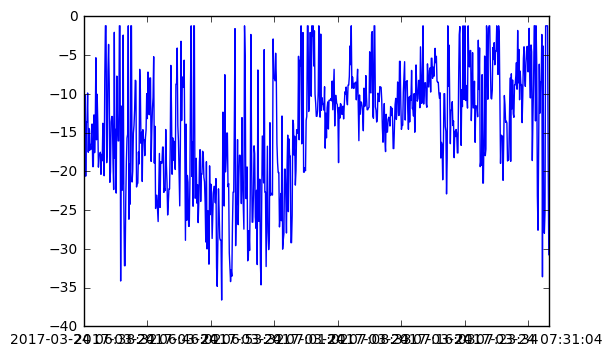

In [465]:
test_X.Microphone.plot()

In [466]:
glen_H_data = glen_H_data.dropna()
glen_H_data_re = glen_H_data.iloc[:,range(5) + range(6,35) + [5]]

In [474]:
# load dataset
dataset = glen_H_data_re.values
X = dataset[:, range(4) + [5, 24] ]
Y = dataset[:,-1]

In [475]:
glen_H_data_re.groupby("classification").size()

classification
D      1652
E       885
S       251
T_D    1159
T_S     789
W      1359
dtype: int64

In [476]:
test.groupby("classification").size()

classification
D       73
E        8
S       37
T_D    297
T_S     84
W      234
dtype: int64

In [486]:
RF_Class = RandomForestClassifier(n_estimators=800, n_jobs=3)

In [482]:
RF_Class.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=3, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [483]:
test_guess = RF_Class.predict(test_X)

In [484]:
RF_Class.score(test_X, test_Y)

0.34379263301500684

In [485]:
RF_Class.feature_importances_

array([ 0.03666475,  0.16067092,  0.10356473,  0.10556559,  0.14457255,
        0.44896146])

In [492]:
confusion_matrix(test_Y, test_guess)

array([[  0,   0,   0,   2,   1,  70],
       [  0,   0,   0,   2,   0,   6],
       [  0,   0,   0,   0,   0,  37],
       [  0,   0,   0,  24,   0, 273],
       [  0,   0,   0,   0,   0,  84],
       [  0,   0,   0,   6,   0, 228]])